# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
import scipy.stats as sts


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low= -90.000, high= 90.000, size=1500)
lngs = np.random.uniform(low= -180.000, high= 180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:  
    
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        record= record + 1
        
    except:
        print("City not found. Skipping...")
    continue

eathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=kavaratti
Processing Record 419 | Deputatsky
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=deputatskiy
Processing Record 420 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=zhigansk
Processing Record 421 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=tessalit
Processing Record 422 | Torrelavega
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=torrelavega
Processing Record 423 | Warmbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=warmbad
Processing Record 424 | Ishigaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58ef8a17cf71342de6cc612f4a0941da&q=ishigaki
Processing Record 425 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weatherpy_dict = pd.DataFrame({
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
})
weatherpy_dict.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [5]:
weatherpy_dict.to_csv('cities.csv')
weatherpy_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,3,PF,1597780296,74,-9.80,-139.03,79.20,21.50
1,Te Anau,100,NZ,1597780296,89,-45.42,167.72,42.94,2.10
2,Mataura,100,NZ,1597780297,81,-46.19,168.86,43.84,5.08
3,Rikitea,0,PF,1597780297,79,-23.12,-134.97,72.05,10.85
4,Saint George,1,US,1597780297,13,37.10,-113.58,106.00,6.17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

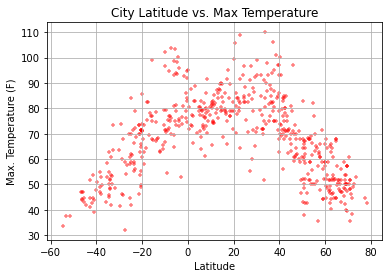

In [14]:
plt.scatter(weatherpy_dict['Lat'], weatherpy_dict['Max Temp'], marker = '+',s = 15, color = 'red', alpha = 0.5)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('cityvstemp.png')
plt.show()
#determining whether or not there was any relationship between 500+ cities' latitude and its' max temperature. As you can see there is no real relationship between the two

## Latitude vs. Humidity Plot

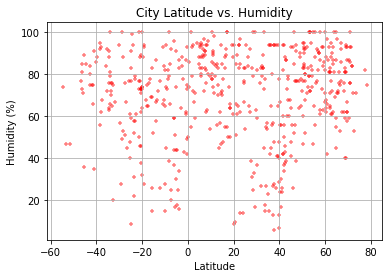

In [15]:
plt.scatter(weatherpy_dict['Lat'], weatherpy_dict['Humidity'], marker = '+',s=15, color = 'red', alpha = 0.5)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('cityvshumidity')
plt.show()
#determining whether or not there was any relationship between 500+ cities' city latitude and the humidity. From the looks of it there seems to be a slight positive correlation.

## Latitude vs. Cloudiness Plot

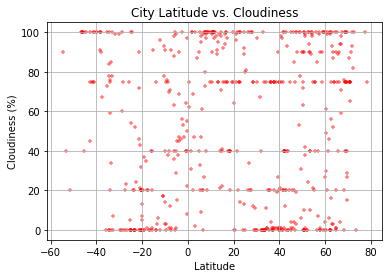

In [16]:
plt.scatter(weatherpy_dict["Lat"], weatherpy_dict["Cloudiness"], marker="+", s=15, color = 'red', alpha = 0.5)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('cityvscloudiness')
plt.show()
#determining whether or not there was any relationship between 500+ cities' city latitude and the cloudiness of that city. As you can see there's no correlation between the two.

## Latitude vs. Wind Speed Plot

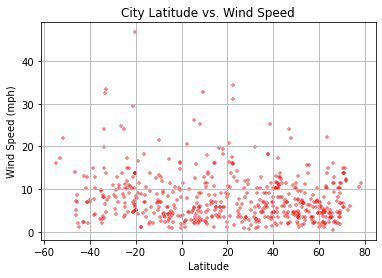

In [17]:
plt.scatter(weatherpy_dict["Lat"], weatherpy_dict["Wind Speed"], marker="+", s=15, color = 'red', alpha = 0.5)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('cityvswindspeed')
plt.show()
#determining whether or not there was any relationship between 500+ cities' city latitude and the wind speed. There may be a slight (very slight) positive correlation but that might be a stretch

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_eq (x,y):
    print(f"The r-squared is : {round(sts.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq


def slope_eq(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=18, color="red")

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weatherpy_dict.loc[weatherpy_dict["Lat"] >= 0]
southern_hemisphere = weatherpy_dict.loc[weatherpy_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.7


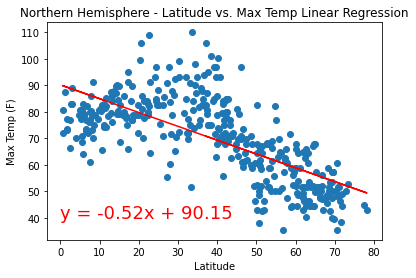

In [27]:
eq = linear_eq(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
slope_eq(eq, 0, 40)
plt.title("Northern Hemisphere - Latitude vs. Max Temp Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig('nh_maxvslat_lr')
plt.show()
#determining whether or not there was any relationship when looking at the Northern Hemisphere alone between latitude and max temp. When looking at just the northern hemisphere you can see there is a negative correlation meaning as the latitude increased the max temp decreased

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8


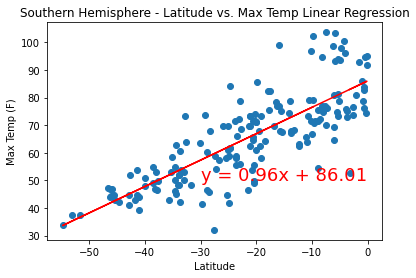

In [28]:
eq = linear_eq(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
slope_eq(eq, -30, 50)
plt.title("Southern Hemisphere - Latitude vs. Max Temp Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig('sh_maxvslat_lr')
plt.show()
#determining whether or not there was any relationship when looking at the Southern Hemisphere alone between latitude and max temp. When looking at just the southern hemisphere you can see there is a positive correlation meaning as the latitude increased so did the max temp

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.01


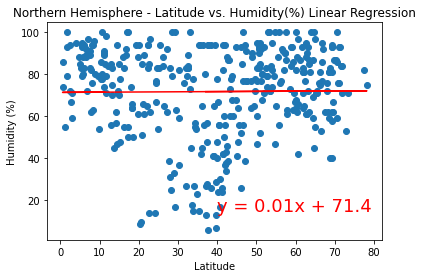

In [29]:
eq = linear_eq(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
slope_eq(eq, 40, 15)
plt.title("Northern Hemisphere - Latitude vs. Humidity(%) Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('nh_humidityvslat_lr')
plt.show()
#determining whether or not there was any relationship when looking at the Northern Hemisphere alone between latitude and humidity. When looking at just the northern hemisphere you can see there is a slight positive correlation meaning as the latitude increased so did the humidity percentage

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.2


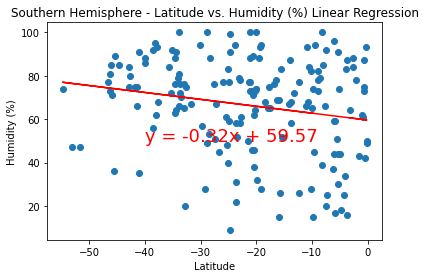

In [31]:
eq = linear_eq(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
slope_eq(eq, -40, 50)
plt.title("Southern Hemisphere - Latitude vs. Humidity (%) Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('sh_humidityvslat_lr')
plt.show()
#determining whether or not there was any relationship when looking at the Southern Hemisphere alone between latitude and humidity. When looking at just the southern hemisphere you can see there is a slight negative correlation meaning as the latitude increased the humidity percentage decreased

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.08


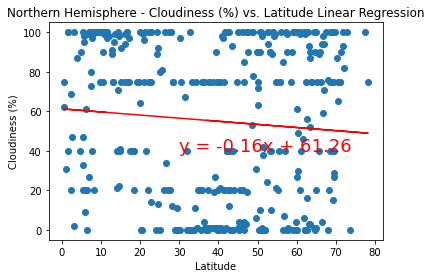

In [34]:
eq = linear_eq(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
slope_eq(eq, 30, 40)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('nh_latvsclouds_lr')
plt.show()
#determining whether or not there was any relationship when looking at the Northern Hemisphere alone between latitude and cloudiness. When looking at just the northern hemisphere you can see there is a slight negative correlation meaning as the latitude increased the cloudiness decreased

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.26


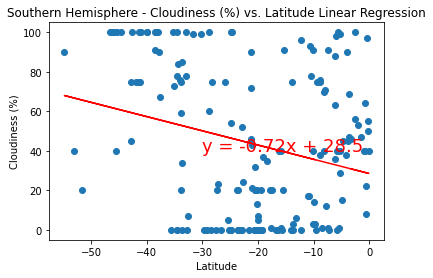

In [38]:
eq = linear_eq(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
slope_eq(eq, -30, 40)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('sh_latvsclouds_lr')
plt.show()
#determining whether or not there was any relationship when looking at the Southern Hemisphere alone between latitude and cloudiness. When looking at just the southern hemisphere you can see there is a negative correlation meaning as the latitude increased the cloudiness decreased

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.08


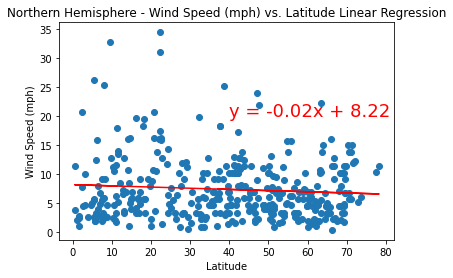

In [43]:
eq = linear_eq(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
slope_eq(eq, 40, 20)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('nh_latvswindspeed_lr')
plt.show()
#determining whether or not there was any relationship when looking at the Northern Hemisphere alone between latitude and wind speed. When looking at just the northern hemisphere you can see there is a slight negative correlation meaning as the latitude increased the wind speed decreased

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.17


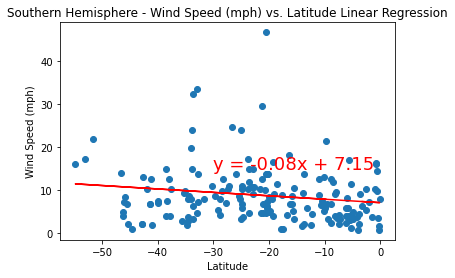

In [44]:
eq = linear_eq(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
slope_eq(eq, -30, 15)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('sh_latvswindspeed_lr')
plt.show()
#determining whether or not there was any relationship when looking at the Southern Hemisphere alone between latitude and wind speed. When looking at just the southern hemisphere you can see there is a negative correlation meaning as the latitude increased the wind speed decreased